# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from __future__ import division
import seaborn as sns

C:\Users\bbenn\Miniconda2\envs\tutorial\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1,0,1,0,0,0,0,0,0,
1,b,1,3,3,6,0,1,1,0,316,...,1,0,1,0,0,0,0,0,0,
2,b,1,4,1,6,0,0,0,0,19,...,1,0,1,0,0,0,0,0,0,
3,b,1,3,4,6,0,1,0,1,313,...,1,0,1,0,0,0,0,0,0,
4,b,1,3,3,22,0,0,0,0,313,...,1,1,0,0,0,0,0,1,0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [5]:
w = data[data.race=='w']
b = data[data.race=='b']

Since we are comparing two means of binomial data, we can perform a permutation test. In this case, the CLT does apply.

In [6]:
%matplotlib inline
w.call.describe()

count    2435.000000
mean        0.096509
std         0.295349
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

In [7]:
b.call.describe()

count    2435.000000
mean        0.064476
std         0.245650
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

**H0:** There is not a stasticially significant difference between the mean of the white call response and the balck call response groups.   
**HA:** The black call response has different mean that the white call response.

In [8]:
# Your solution to Q3 here

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

### Boostrapping Approach

In [14]:
diff_of_means = np.abs(np.mean(w.call) - np.mean(b.call))

permutation_replicates = np.empty(100000)

for i in range(len(permutation_replicates)):
    permutation_samples = np.random.permutation(np.concatenate((w.call, b.call)))
    
    white_perm = permutation_samples[:len(w.call)]
    black_perm = permutation_samples[len(b.call):]
    
    permutation_replicates[i] = np.abs(np.mean(white_perm) - np.mean(black_perm))

p = np.sum(permutation_replicates > diff_of_means) / len(permutation_replicates)
print('p =', p)

('p =', 4.0000000000000003e-05)


In [16]:
# assuming alpha = 0.05
SE = np.sqrt(np.std(w.call) ** 2 / len(w.call) + np.std(b.call) ** 2 / len(b.call))

margin_of_error = 1.96 * SE

confidence_interval = [diff_of_means- margin_of_error, diff_of_means + margin_of_error]


print('The margin of error is', margin_of_error)
print('The 95% confidence interval is', confidence_interval)

('The margin of error is', 0.015255406762133441)
('The 95% confidence interval is', [0.016777448092927139, 0.047288261617194016])


### Frequenist Test

We will use a Chi-Squared test on the data

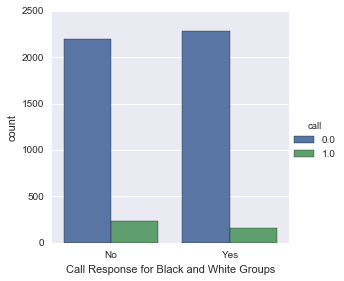

In [25]:
_ = sns.factorplot(x='race',hue='call', data=data, kind='count')
_.set_xticklabels(['No','Yes'])
plt.xlabel('Call Response for Black and White Groups')



In [26]:
cont_table = pd.crosstab(index=data.call, columns=data.race, margins=True)
cont_table.columns = ['Black', 'White', 'Total']
cont_table.index=['No','Yes', 'Total']
cont_table


,Black,White,Total
No,2278,2200,4478
Yes,157,235,392
Total,2435,2435,4870


In [27]:
final_table = pd.crosstab(index=data.call, columns=data.race)


In [28]:
chi2, p, dof, ex =stats.chi2_contingency(final_table)
chi2, p, dof


(16.449028584189371, 4.9975783899632552e-05, 1L)

In [29]:
stats.chi2.ppf(q=0.95, df=dof)


3.8414588206941236

These results indicate that we can rejuct the null hypothesis in favor of the alternative hypothesis. There is a statistically significant difference for black people in getting call backs on resume sumittals. The Chi Squared test showed that black people receive 3.84% fewer call backs on their resumes.  
This does not mean that race is the most important factor in getting a call back. If I were to re-do this analysis, I would construct a linear regression model of all appropriate variables (education, prestiege, class background, grades, etc), to determine the most important factors. 